<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Assignment 2

In [1]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'Auto.csv':'https://storage.googleapis.com/aipi_datasets/Auto.csv',
        'copper-new.txt':'https://storage.googleapis.com/aipi_datasets/copper-new.txt'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

## Question 1 [12 points]
For each of the following modeling problems, indicate which evaluation metric you would select to evaluate your model using the test dataset.  Please select ONE of the following choices for each problem: MSE, MAE, MAPE, Precision, Recall, Accuracy and explain in 1-2 sentences why you chose that metric.  

1)    I am creating a model to detect lung toxicity from chest x-rays.  Lung toxicity can be fatal if not detected and treated sufficiently early.    

2)    I am creating a model to predict power demand for the local electric utility.  I know that if my model is off slightly on a regular basis it is not a major issue, but if I am way off during a day of particularly low or high demand, it can cost the utlity a lot of money (e.g. because they have to start up expensive “peaker plants” to produce extra energy if I predict high demand, so I better not be wrong).  

3)    I am a day trader (meaning I buy and sell stocks on a daily basis) and I have built a stock price prediction model to support my trading.  I take a careful approach to my trading and I buy and sell frequent, small amounts of stock at a time – I do not place big bets.  Therefore, large errors of my model are not significantly worse than numerous small errors over time.  I need a metric which is easily understandable and fits my activity.  

4)    I am building a model to determine which students should be allowed to come on campus to classes vs. which should stay at home and watch via zoom.  My model aims to predict which students are likely to be healthy (positive class) vs. which are likely to be at risk of COVID (negative class).  

YOUR ANSWER HERE:

1) Recall - I would choose recall as the metric to focus on for this use case as the cost of misclassifying a positive label (has lung toxicity) as a negative label (doesn't have lung toxicity) and out of all patients who have lung toxicity, you would want to maximize the number of samples correctly predicted as so. And this is what recall measures.

2) MSE - I would choose MSE as the metric for this use case as the model being regularly slightly off is better than being way off during a certain day, and since MSE is known to penalize large errors much more severley than small errors, which would tune the model to make smaller errors.

3) MAE - Since the use case wouldn't have a significant impact due to large errors but is more focused on making the metric more interpretable, I would choose MAE.

4) Precision - I would choose precision as the metric to focus on for this use case as the cost of misclassifying a negative label (has COVID) as a positive label (doesn't have COVID) and out of all students who were predicted as healthy, you would want to maximize the number of samples correctly predicted as so. And this is what precision measures.

## Question 2 [20 points]
In the class lecture we stated that the mean squared error (MSE) of a model is the sum of the squared bias plus the variance (plus a component of irreducible error which we will ignore in this question for purposes of simplifying).  In this problem I would like you to derive this relationship via equations.  
 
As a starting point, we know the following:  

$$ MSE = E[(y-\hat{f}(x))^2] $$

$$ Bias = (y-E[\hat{f}(x)]) $$

$$ Variance = E[(\hat{f}(x)-E[\hat{f}(x)])^2] $$

Also, we know that by definition for a random variable Z:  

$$ Var[Z] = E[Z^2]-(E[Z])^2 $$


Use the above to derive the equation for MSE:  

$$ MSE = Bias^2 + Variance $$

A formal mathematical proof is not required but you must show the equations for each step of your derivation, and for each step you must include a brief comment describing what you are doing at that step.

YOUR ANSWER HERE:

For the proof, I will be making the following assumptions:

$$ 1) (\hat{f}(x)) = \hat{y} $$

2) E[y] = y, since y represents the true values and are not random variables, and the random variable in this case will be f(x)

Starting by expanding MSE:

$$ MSE = E[(y - \hat{y})^2] $$

$$ MSE = E[(y - \hat{y}) * (y - \hat{y})] $$

$$ MSE = E[y^2 - 2*y*\hat{y} + (\hat{y})^2] $$

$$ MSE = E[(\hat{y})^2] - E[2*y*\hat{y}] + E[y^2] $$

$$ MSE = E[(\hat{y})^2] - 2*y*E[\hat{y}] + y^2 $$

$$ MSE = y^2- 2*y*E[\hat{y}] + E[(\hat{y})^2] $$


Now, expanding the Bias term:

$$ Bias = y - E[\hat{y}] $$

$$ Bias^2 = (y - E[\hat{y}])*(y - E[\hat{y}]) $$

$$ Bias^2 = y^2 - 2*y*E[\hat{y}] + E^2[\hat{y}] $$

Finally, adding both the Variance and Bias term:

$$ Variance = E[\hat{y}^2] - E^2[\hat{y}] $$

$$ Bias^2 = y^2 - 2*y*E[\hat{y}] + E^2[\hat{y}] $$

$$ Variance + Bias = E[\hat{y}^2] - E^2[\hat{y}] + y^2 - 2*y*E[\hat{y}] + E^2[\hat{y}] $$

$$ Variance + Bias = E[\hat{y}^2] + y^2 - 2*y*E[\hat{y}] $$

Rearranging this, we get:

$$ Variance + Bias =  y^2- 2*y*E[\hat{y}] + E[(\hat{y})^2] $$

Which is the exapended form for MSE as well

Hence:

$$ MSE = Variance + Bias^2 $$

## Question 3: Linear Regression Closed Form Solution [20 points]
In most cases where we are training a linear regression model we will use an iterative solving method such as gradient descent.  However, as discussed in class for small datasets it is feasible to calculate the closed form solution for the optimal coefficients.  In this question we will practice this approach to understand how it is done.  

Complete the below function `lr_closedform()` which first calculates the closed form solution for the coefficients (in this case, the bias term and a single coefficient) of a linear regression model.  The function should then apply your model on the data in `X_test` and return the predictions.

Your code for this question must be done in plain Python - **you may NOT use any packages** (you will notice none have been imported for you yet in this notebook).  You may also NOT use any AI assistants (e.g. GitHub Copilot) on this - I want you to think though yourself how to approach this.

Your function should work for any data of the same shape as the training data provided (3 observations, 1 feature + bias).  It does not need to work on inputs of any other size.

Hint: if it has been a while since you have thought about linear algebra (or have never done it), you may need to look up how to invert a matrix.  For this problem, due to the small size of the data, it is fairly straightforward.

In [2]:
X_train = [[1,2],[1,3],[1,4]] # Training data inputs - 3 observations, each having a bias multiplier in first position (a '1') and a single feature
y_train = [5,6,8] # Training data targets
X_test = [[1,1],[1,4],[1,0.5],[1,6]] # Test input - 4 observations, each having a bias multiplier (a '1') in first position and a single feature

In [3]:
def matrix_mult(A, B):

    C = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]

    # for i in range(len(C)):
    #     for j in range(len(C[0])):
    #         C[i][j] = round(C[i][j], 2)

    return C

In [4]:
def det_mat(matrix):
    dets = []
    if len(matrix) == 1:
        return matrix[0][0]
    elif len(matrix) == 2:
        return (matrix[0][0]*matrix[1][1]) - (matrix[0][1]*matrix[1][0])
    else:
        for i in range(len(matrix)):
            minor_matrix = [row[:i] + row[i+1:] for row in matrix[1:]]
            det = matrix[0][i] * (-1)**i * det_mat(minor_matrix)
            dets.append(det)
        return dets

def adj_mat(matrix):
    adjugate = []
    for i in range(len(matrix)):
        adjugate_row = []
        for j in range(len(matrix)):
            minor_matrix = [row[:j] + row[j+1:] for row in (matrix[:i] + matrix[i+1:])]
            cofactor = (-1) ** (i + j) * det_mat(minor_matrix)
            adjugate_row.append(cofactor)
        adjugate.append(adjugate_row)
    return adjugate

In [5]:
def lr_closedform(X_train,y_train,X_test):
    '''
    Computes the closed form solution for the linear regression model relating the inputs X and outputs y

    Inputs:
        X_train(list): array of input training data stored as list of lists (including bias multiplier)
        y_train(list): target data
        X_test(list): array of input test data stored as list of lists (including bias multiplier)

    Returns:
        preds(list): predictions of your model on the test data
    '''

    # YOUR CODE HERE

    X_train_transpose = list(zip(*X_train))

    mult_Xs = matrix_mult(X_train_transpose, X_train)

    det = det_mat(mult_Xs)

    adj = adj_mat(mult_Xs)

    inverse_matrix = [[adj[i][j] / det for j in range(len(mult_Xs))] for i in range(len(mult_Xs))]

    temp_1 = matrix_mult(inverse_matrix, X_train_transpose)

    weights = matrix_mult(temp_1, [[x] for x in y_train])

    y_preds = matrix_mult(X_test, weights)

    preds = [item for sublist in y_preds for item in sublist]
    
    return preds

    raise NotImplementedError()

In [6]:
# Test cell
preds = lr_closedform(X_train,y_train,X_test)
assert len(preds) == 4

assert round(preds[0],1) == 3.3
assert round(preds[1],1) == 7.8
assert round(preds[2],1) == 2.6
assert round(preds[3],1) == 10.8

## Question 4: Classification metrics and the ROC curve [10 pts]
### Question 4.0 [5 pts]
Run the cell below to display the actual target values, stored as `y`, for a classification modeling task, along with the probabilistic predictions from a classification model (the probability of the positive class) stored as `pred_probs`.  

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Actual y values saved as y:
np.random.seed(0)
y = np.round(np.random.rand(20)).astype(int)

# Predictions (probabilities of the positive class) saved as pred_probs:
np.random.seed(1)
pred_probs = np.round(np.random.rand(20),decimals=2)

print('Y values are {}'.format(y))
print('Predicted probabilities from the model are {}'.format(pred_probs))

Y values are [1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1]
Predicted probabilities from the model are [0.42 0.72 0.   0.3  0.15 0.09 0.19 0.35 0.4  0.54 0.42 0.69 0.2  0.88
 0.03 0.67 0.42 0.56 0.14 0.2 ]


Now, complete the below function `calc_metrics()`.  The function takes as inputs the true values `y` and the probabilistic predictions `pred_probs` and then calculates the following metrics on the predictions, using a threshold of >= 0.5 for predicting the positive class (1):
- Accuracy
- Recall
- Precision
- F1 Score

Your function should return the four metrics above for the positive class (1) as float values, in the order shown above.

You may use NumPy methods but **may NOT use any Scikit-Learn methods** to do this problem.


In [8]:
def conf_matrix(y, y_preds):
    TP, FP, FN, TN = 0, 0, 0, 0

    for actual, pred in zip(y, y_preds):
        if actual == pred:
            if actual == 1:
                TP += 1
            else:
                TN += 1
        if actual != pred:
            if actual == 1 and pred == 0:
                FN += 1
            elif actual == 0 and pred == 1:
                FP += 1
    return TP, FP, FN, TN

In [9]:
def calc_metrics(y,pred_probs):
    '''
    Calculates the accuracy, recall, precision and F1 score for a set of predictions and actuals using threshold >= 0.5 for positive class

    Inputs:
        y(np.array): array of actual target values
        pred_probs(np.array): array of probabilistic predictions of the positive class

    Returns:
        acc(float): accuracy of the predictions
        recall(float): recall of the predictions
        precision(float): precision of the predictions
        f1(float): F-1 score of the predictions
    '''
    
    # YOUR CODE HERE

    y_preds = [1 if x >= 0.5 else 0 for x in pred_probs]

    TP, FP, FN, TN = conf_matrix(y, y_preds)
    
    acc = (TP + TN) / (TP + FP + FN + TN)

    recall = TP / (TP + FN)

    precision = TP / (TP + FP)

    f1 = 2 * ((precision * recall)/(precision + recall))

    return acc, recall, precision, f1

    raise NotImplementedError()

In [10]:
# Test cell
acc,recall,precision,f1 = calc_metrics(y,pred_probs)

print('Your function calculated the metrics as follows:')
print('Accuracy: {:.3f}'.format(acc))
print('Recall: {:.3f}'.format(recall))
print('Precision: {:.3f}'.format(precision))
print('F1 Score: {:.3f}'.format(f1))

assert np.round(acc,2)==0.40
assert np.round(recall,2)==0.29
assert np.round(precision,2)==0.67
assert np.round(f1,2)==0.40

Your function calculated the metrics as follows:
Accuracy: 0.400
Recall: 0.286
Precision: 0.667
F1 Score: 0.400


### Question 4.1 [5 pts]
Now, complete the function `calc_roc()` to calculate the values needed to plot a ROC curve for the model.  The function should take as input the actual values `y` and the probabilistic predictions of the positive class `pred_probs`.  The function should vary the threshold for predicting the positive class (1) using the range `thresh_vals` provided as input and for each threshold value, should compute the true positive rate (tpr) and false positive rate (fpr) of the predictions.  Your function should return two lists: the first list containing the tpr values at each threshold, and the second list containing the fpr values at each threshold.


Again you **may NOT use any Scikit-Learn methods** for this part


In [11]:
def calc_roc(y,pred_probs,thresh_vals):
    '''
    Calculates the TPR and FPR of the predictions for all threshold values specified in the input.  Use >= threshold for 
    predicting the positive class

    Inputs:
        y(np.array): array of actual target values
        pred_probs(np.array): array of probabilistic predictions of the positive class
        thresh_vals(np.array): array of threshold values

    Returns:
        tprs(list): list of TPR values for each threshold
        fprs(list): list of FPR values for each threshold
    '''

    # YOUR CODE HERE

    tprs, fprs = [], []

    for thresh in thresh_vals:
        y_preds = [1 if x >= thresh else 0 for x in pred_probs]

        TP, FP, FN, TN = conf_matrix(y, y_preds)

        TPR = TP / (TP + FN)

        FPR = FP / (FP + TN)

        tprs.append(TPR)

        fprs.append(FPR)
    
    return tprs, fprs
        
    raise NotImplementedError()

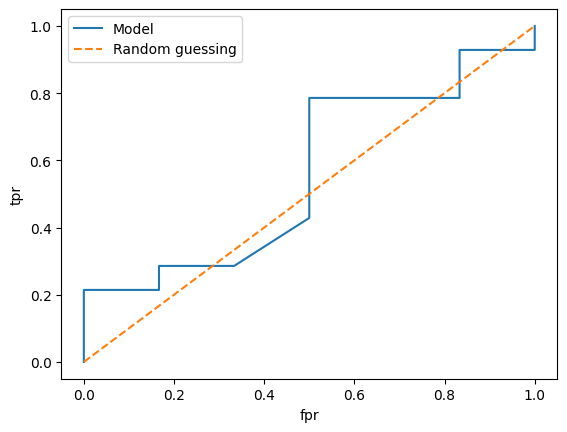

In [12]:
# Test cell
thresh_vals = np.arange(0.0,1.01,0.01)
tprs,fprs = calc_roc(y,pred_probs,thresh_vals)
assert (len(tprs),len(fprs))==(101,101)
plt.plot(fprs,tprs,label='Model')
plt.plot([0,1],[0,1],linestyle='--',label='Random guessing')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

assert (np.round(np.mean(tprs),2)==0.39 or np.round(np.mean(tprs),2)==0.38)
assert (np.round(np.mean(fprs),2)==0.34 or np.round(np.mean(fprs),2)==0.33)

## Question 5: Bias-Variance Tradeoff [18 points]
In this question we are going to be working with an automotive dataset.  Our goal is to build a model to predict fuel efficiency (mpg) from engine horsepower.  We will be using a Random Forest for our model (you don't need to know what this is for purposes of answering this question, we will cover it later).    

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

# Read in data
data = pd.read_csv('Auto.csv')
# Remove rows with missing values
data = data[data['horsepower'] != '?']

# Define the features and target (X and y)
X = data['horsepower'].astype(int).values.reshape(-1,1)
y = data['mpg'].values.astype(float)

# Split into training and test sets
X_train_full,X_test,y_train_full,y_test = train_test_split(X, y, random_state=0,test_size=0.1)

# Model to use. Will vary min_samples_leaf and calculate cross-validation MAE 
model = RandomForestRegressor(min_samples_leaf=1,random_state=0)

# Values of the hyperparameter min_samples_leaf to compare using cross-validation
msl_range = np.arange(1,41,1)

# Number of folds to use for k-folds cross validation
folds = 3

### Q5.0 (9 points)

**When the value of min_samples_leaf is large (e.g. 35-40), is the model underfitting, overfitting, or fitting just right?  Defend your answer with 1-2 sentences and include a visualization of the model training and validation MAE generated by your code to explain your answer.**


Our task is to compare the performance of the model using the different values for the hyperparameter `min_samples_leaf` listed in `msl_range`.  You should compare them using **3-fold cross-validation** and you should use **Mean Absolute Error** as your evaluation metric for comparision. 

Use the below space to write your code to compare the performance of the model using the different values of `min_samples_leaf` and generate any charts needed to answer the question.  

YOUR ANSWER HERE:

As the number of leaves get larger (35-40), it can be seen the training MAE starts to stagnate at a constant value while the valdiation MAE keeps increasing. This indicates the model is fixating to well on the training data and is unable to generalize to validation data, indicating the model is overfitting

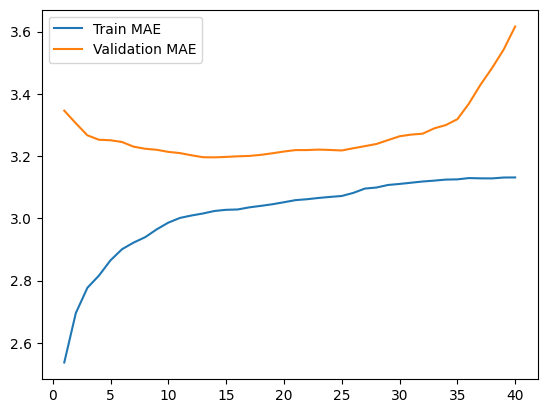

In [14]:
# Use this cell to write any code and generate the visualizations you need to answer the question

# YOUR CODE HERE

models = [RandomForestRegressor(min_samples_leaf=leaf,random_state=0) for leaf in msl_range]

mae_val = []

mae_train = []

kf = KFold(n_splits=3)

for model in models:
    mae_val_folds = []
    for train_idx, val_idx in kf.split(X=X_train_full, y=y_train_full):
        X_fold_train, X_fold_val = X_train_full[train_idx], X_train_full[val_idx]
        y_fold_train, y_fold_val = y_train_full[train_idx], y_train_full[val_idx]

        model.fit(X_fold_train, y_fold_train)

        val_preds = model.predict(X_fold_val)

        val_mae = mean_absolute_error(y_fold_val, val_preds)

        mae_val_folds.append(val_mae)
    
    model.fit(X_train_full, y_train_full)

    train_preds = model.predict(X_train_full)

    train_mae = mean_absolute_error(y_train_full, train_preds)

    mae_val.append(np.mean(mae_val_folds))
    mae_train.append(train_mae)

import matplotlib.pyplot as plt

plt.plot(msl_range, mae_train, label = "Train MAE")
plt.plot(msl_range, mae_val, label = "Validation MAE")
plt.legend()
plt.show()

### Q5.1 (9 points)
When the value of min_samples_leaf is small (e.g. 1-5), is the model underfitting, overfitting, or fitting just right?  Defend your answer with 1-2 sentences and include a visualization of the model training and validation MAE generated by your code to explain your answer.

YOUR ANSWER HERE:

Wen the number of leaves start out small (1-5), it can be seen that the training MAE starts off low but increases while the validation MAE starts off high and decreases. This along with the small number of leaves could allude to the simplicity of the model, indicating the model is underfit

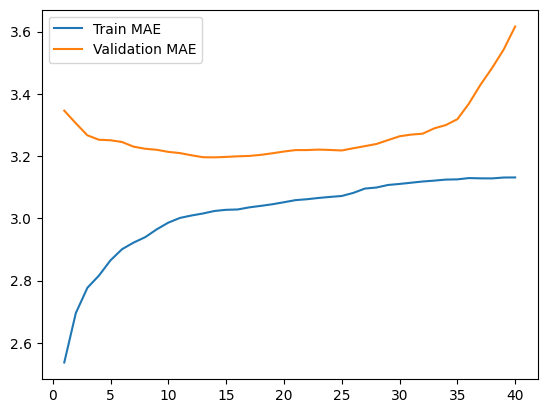

In [15]:
# Use this cell to write any code and generate the visualizations you need to answer the question

# YOUR CODE HERE

models = [RandomForestRegressor(min_samples_leaf=leaf,random_state=0) for leaf in msl_range]

mae_val = []

mae_train = []

kf = KFold(n_splits=3)

for model in models:
    mae_val_folds = []
    for train_idx, val_idx in kf.split(X=X_train_full, y=y_train_full):
        X_fold_train, X_fold_val = X_train_full[train_idx], X_train_full[val_idx]
        y_fold_train, y_fold_val = y_train_full[train_idx], y_train_full[val_idx]

        model.fit(X_fold_train, y_fold_train)

        val_preds = model.predict(X_fold_val)

        val_mae = mean_absolute_error(y_fold_val, val_preds)

        mae_val_folds.append(val_mae)
    
    model.fit(X_train_full, y_train_full)

    train_preds = model.predict(X_train_full)

    train_mae = mean_absolute_error(y_train_full, train_preds)

    mae_val.append(np.mean(mae_val_folds))
    mae_train.append(train_mae)

import matplotlib.pyplot as plt

plt.plot(msl_range, mae_train, label = "Train MAE")
plt.plot(msl_range, mae_val, label = "Validation MAE")
plt.legend()
plt.show()

## Question 6 [20 points]
We are given a dataset from an experiment looking at how the thermal expansion coefficient of copper changes with temperature.  Our task is to model the relationship of thermal expansion coefficent to temperature to be able to predict the coefficient for any new temperature value.  We will use a Linear Regression model, but will apply polynomial transforms to the input data X in order to better capture the relationship between X and y.  We will evaluate different polynomial transforms to select the optimal polynomial order to use.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the data
copperdata = pd.read_csv('copper-new.txt',header=None)
copperdata['X'] = copperdata.apply(lambda x: x.str.split()[0][1],axis=1)
copperdata['y'] = copperdata.apply(lambda x: x.str.split()[0][0],axis=1)
copperdata = copperdata[['X','y']].astype(float)
copperdata.head()


,X,y
0,24.41,0.591
1,54.98,4.703
2,89.57,9.470
3,114.26,11.615
4,133.61,12.970


### Question 6.0 [10 pts]
If we were to fit a linear regression model on this data, does it violate the assumption of linearity between the input and targets?  For credit you must justify your answer by referring to BOTH a scatterplot of the data and a plot of the residuals/errors vs your predictions and explain how we answer this question based on the plots. 


YOUR ANSWER HERE:

It can be seen from the scatterplot that the data is a curved fashion and a linear model wouldn't fit the model well. As additional support, the errors v/s predictions plot shows the errors aren't uniformly distributed around the 0 line.

Hence, the linear regression model violates the assumption of linearity between the input and targets

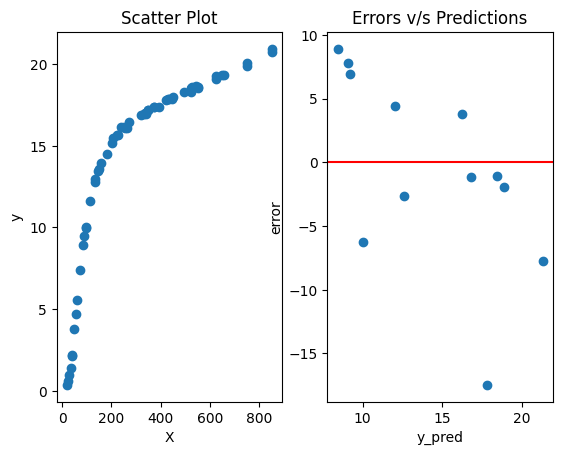

<Figure size 1000x1000 with 0 Axes>

In [17]:
# Use this cell to write the code and generate the visualizations you need to answer the question

# YOUR CODE HERE


X = np.array(copperdata['X'])
y = np.array(copperdata['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

y_pred = model.predict(X_test.reshape(-1, 1))

errors = [y - y_hat for y, y_hat in zip(y_train, y_pred)]

figure, axis = plt.subplots(1, 2)

axis[0].scatter(X, y)
axis[0].set_title("Scatter Plot")
axis[0].set_xlabel("X")
axis[0].set_ylabel("y")

axis[1].scatter(y_pred, errors)
axis[1].set_title("Errors v/s Predictions")
axis[1].axhline(y=0, color='red')
axis[1].set_xlabel("y_pred")
axis[1].set_ylabel("error")

# plt.plot(y_pred, errors)

# plt.scatter(X, y)
plt.figure(figsize=(10, 10))
plt.show()

### Question 6.1 [10 pts]
Let's see if we can use polynomial regression to find a better fitting model than a standard linear regression.  When doing your polynomial transformation be sure to include a bias term

Complete the below function `polynomial_model()` which finds the optimal degree polynomial transform (from the list provided as input) using a fixed validation set.  Split your data to use 10% as the test set.  Of the remaining 90%, use 80% of that for training and 20% for validation.  Be sure to use `random_state=0` when splitting your data.  Your function should return the optimal degree of polynomial transform which minimizes MAE on the validation set, and the MAE of your final model on the test set (be sure to retrain on the full data after finding your optimal transform).


In [18]:
def polynomial_model(df,n_range):
    '''
    Finds the optimal degree of polynomial transform and calculates the MAE of the optimal model on the test set

    Inputs:
        df(DataFrame): dataframe containing the inputs and targets
        n_range(list): list of values to use for degree of the polynomial transform

    Returns:
        opt_degree(int): optimal degree of polynomial transform that minimizes MAE on the validation set
        test_mae(float): MAE on the test set
    '''
    
    # YOUR CODE HERE

    val_maes = []

    X_train_orig, X_test, y_train_orig, y_test = train_test_split(np.array(df['X']), np.array(df['y']), random_state=0, test_size=.10)

    X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=.20, random_state=0)

    for n in n_range:

        poly = PolynomialFeatures(degree=n, include_bias=True)

        poly_features = poly.fit_transform(X_train.reshape(-1, 1))

        val_features = poly.transform(X_val.reshape(-1, 1))

        poly_reg_model = LinearRegression()

        poly_reg_model.fit(poly_features, y_train)

        y_preds = poly_reg_model.predict(val_features)

        val_mae = mean_absolute_error(y_preds, y_val)

        val_maes.append(round(val_mae, 2))
    
    opt_degree = np.argmin(val_maes) + 1

    poly_final =PolynomialFeatures(degree=opt_degree, include_bias=True)

    poly_feat_final = poly_final.fit_transform(X_train_orig.reshape(-1, 1))

    test_features = poly_final.transform(X_test.reshape(-1, 1))

    poly_reg_model = LinearRegression()

    poly_reg_model.fit(poly_feat_final, y_train_orig)

    y_preds = poly_reg_model.predict(test_features)

    val_mae = round(mean_absolute_error(y_preds, y_test), 2)

    return opt_degree, val_mae

    raise NotImplementedError()

In [19]:
# Test cell
n_range = range(1,8)
opt_degree, test_mae = polynomial_model(copperdata, n_range)


print('Your function found the optimal degree was {}'.format(opt_degree))
print('Your function calculated a test set MAE of {:.3f}'.format(test_mae))

assert opt_degree == 5
assert np.round(test_mae,2)==0.16


Your function found the optimal degree was 5
Your function calculated a test set MAE of 0.160
